# Mathematik für Biologiestudierende

Wintersemester 2024/25

21.01.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Themen heute

* Normalverteilungsannahmen
* Wilcoxon-Test
* Mann-Whitney-Test
* Funktionsweise von Rangtests

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set_theme()

# Normalverteilungsannahmen

### t-Test zum Vergleich zweier Erwartungswerte bei verbundenen Stichproben

* Gegeben sind Zufallsvariable $X_1, \dots, X_n$ und $Y_1, \dots, Y_n$
* Verteilungsvoraussetzungen:
  * Alle $X_j$ sind **normalverteilt** mit unbekanntem Erwartungswert $\mu_1$ und unbekannter Varianz $\sigma^2$
  * Alle $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und unbekannter Varianz $\sigma^2$
  * Die beiden Varianzen müssen also gleich sein
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werden

# Q-Q-Plot

Wie überprüfen wir die Gültigkeit der Verteilungsannahme?

* Mit dem Quantil-Quantil-Plot kann man auf graphischem Wege beurteilen, ob Messwerte Realisierungen einer normalverteilten Zufallsvariablen sind
* Man trägt dazu auf der $x$-Achse die Quantile der Standardnormalverteilung und auf der $y$-Achse die Quantile der
    Beobachtungsdaten auf
* Wenn diese Punkte annähernd auf einer Geraden liegen, sind die Daten näherungsweise normalverteilt, ansonsten nicht

* es gibt auch Testverfahren, um auf Normalverteilungsannahmen zu testen
* nicht ganz klar, wie sinnvoll das ist

Beispieldaten aus Lektion 12

In [3]:
u = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
df = pd.read_csv(u, index_col=0)
df.head()

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152


In [4]:
import statsmodels.api as sm

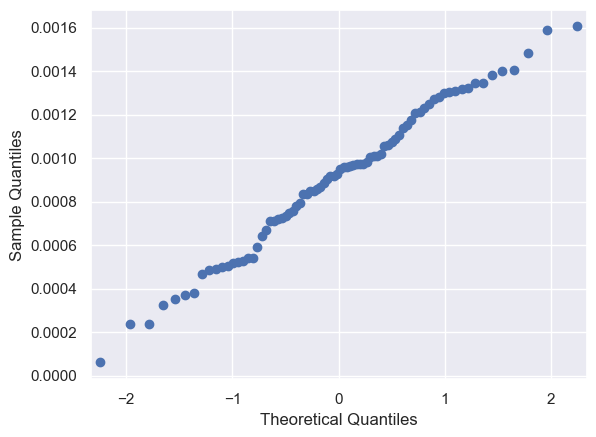

In [5]:
pp = sm.ProbPlot(df.Konzentration)
pp.qqplot();

Wunderbar normalverteilt

Die Daten aus dem synthetischen Medikamentenexperiment aus Lektion 13

In [8]:
df = pd.read_csv('treatment.csv', index_col=0)
df.head()

,t0,t1,Treatment,Difference
0,63.0,62.0,Verum,-1.0
1,24.0,22.0,Verum,-2.0
2,77.0,72.0,Verum,-5.0
3,43.0,41.0,Verum,-2.0
4,88.0,84.0,Verum,-4.0


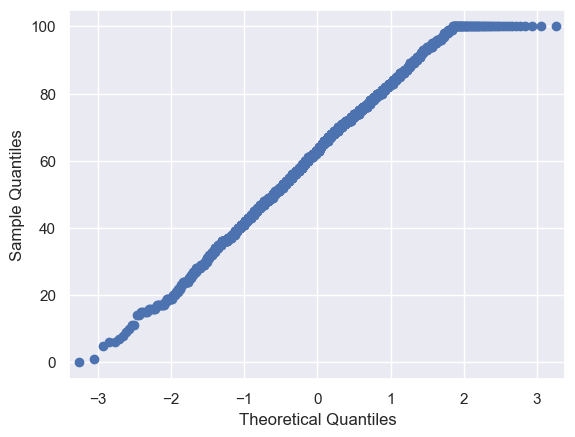

In [7]:
pp = sm.ProbPlot(df.t0)
pp.qqplot();

Die Daten sind nicht normalverteilt, weil sie oben bei 100 abgeschnitten wurden

### Beispiel Galapagos Inseln

Ein Datensatz zum Buch "Linear Models with Python" von Faraway

In [9]:
df = pd.read_csv("galapagos.csv", index_col=0)
df.head()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82


* echte Daten von 30 Galapagos-Inseln
* für jede Galapagos-Insel wurde erhoben
  * `Species`: Anzahl verschiedener (Säuge)tierarten
  * `Area`: Fläche
  * `Elevation`: höchster Punkt
  * `Nearest`: Abstand zur nächsten Insel
  * `Scruz`: Entfernung von Santa Cruz
  * `Adjacent`: Fläche der nächstgelegenen Insel

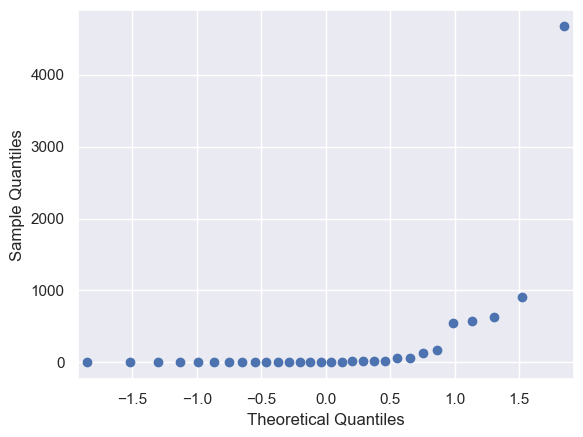

In [10]:
pp = sm.ProbPlot(df.Area)
pp.qqplot();

Klar nicht normalverteilt

# Nicht-parametrische Tests

Beispiel für Situationen, in denen man nicht-parametrische Tests macht:

* Wenn die Verteilungsannahmen nicht erfüllt sind
* Wenn die Stichprobenumfänge zu klein sind
* Wenn die Zufallsvariable diskret ist

## Vergleich zweier Mediane

* Bei Zufallsvariablen, die nicht normalverteilt sind, ist der Erwartungswert oft bedeutungslos
* Man vergleicht dann besser die Mediane

### Vergleich zweier Erwartungswerte bzw. zweier Mediane

|Vergeich                 | parametrisch                        |   nicht-parametrisch |
|-------------------------|-------------------------------------|----------------------|
|mit Referenzwert         | t-Test für verbundene Stichproben   | Wilcoxon-Test        |
|vorher-nachher           | t-Test für verbundene Stichproben   | Wilcoxon-Test        |
|verschiedene Populationen| t-Test für unverbundene Stichproben | Mann-Whitney-U-Test  |

* Die *t*-Teste vergleichen Erwartungswerte
* Wilcoxon und Mann-Whitney-U Test vergleichen Mediane

## Wilcoxon-Signed-Rank-Test

Den Wilcoxon Test verwendet man zum Vergleich der Mediane verbundener Datensätze, wenn die Normalverteilungsannahme nicht gesichert ist.

Als Beispiel rechnen wir die Schadstoffkonzentration auch noch einmal als Wilcoxon-Signed-Rank-Test

In [11]:
u = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
df = pd.read_csv(u, index_col=0)
df['Referenz'] = 0.08 / 100

* Wir vergleichen die Konzentration mit dem Referenzwert 0.08

In [14]:
res = stats.wilcoxon(df.Konzentration, df.Referenz, alternative="greater")
res

WilcoxonResult(statistic=2169.0, pvalue=0.004229703509534525)

Zum Vergleich:

In [15]:
stats.ttest_rel(df.Konzentration, df.Referenz, alternative="greater")

TtestResult(statistic=2.768040010585661, pvalue=0.0035114445640696246, df=79)

* Der Unterschied der p-Werte ist unerheblich
* Der Wert der Statistik ist verschieden, weil der Test völlig anders arbeitet

# Effektstärke beim Wilcoxon-Test

* beim Wilcoxon-Test bestimmt man die Effektstärke mit *Cohen's&nbsp;r*
* dazu ist es erforderlich, den Test noch einmal mit `method="approx"` zu rechnen, um die z-Statistik zu bekommen

* Formel
$$ r = \frac{z}{\sqrt n} $$
* hierbei ist $z$ der Wert der z-Statistik 
* und $n$ der Stichprobenumfang

In [18]:
res = stats.wilcoxon(df.Konzentration, df.Referenz, alternative="greater", method="approx")
res

WilcoxonResult(statistic=2169.0, pvalue=0.004229703509534525)

In [19]:
res.zstatistic

2.6331616685404655

In [20]:
n = df.Konzentration.count()
n

80

In [21]:
r = abs(res.zstatistic / np.sqrt(n))
r

0.2943964243301625

### Interpretation der Effektstärke für Cohen's r

| r-Wert | Interpretation   |
|--------|------------------|
| 0.1    | geringer Effekt  |
| 0.3    | mittlerer Effekt |
| 0.5    | starker Effekt   |

Wir haben also einen mittleren Effekt beobachtet

### zum Vergleich noch mal mit dem $t$-Test

In [22]:
df.describe()

,Messstelle,Konzentration,Referenz
count,80.000000,80.000000,8.000000e+01
mean,2.987500,0.000905,8.000000e-04
std,1.409675,0.000341,1.091043e-19
min,1.000000,0.000061,8.000000e-04
25%,2.000000,0.000701,8.000000e-04
50%,3.000000,0.000938,8.000000e-04
75%,4.000000,0.001158,8.000000e-04
max,5.000000,0.001605,8.000000e-04


In [23]:
d = (0.000905-0.0008) / 0.000341
d

0.3079178885630497

### Interpretation der Effektgröße für Cohen's d

| d-Wert | Interpretation   |
|--------|------------------|
| 0.2    | geringer Effekt  |
| 0.5    | mittlerer Effekt |
| 0.8    | starker Effekt   |

# Mann-Whitney-U-Test

Den Mann-Whitney Test verwendet man zum Vergleich der Mediane unverbundener Datensätze, wenn die Normalverteilungsannahme nicht gesichert ist

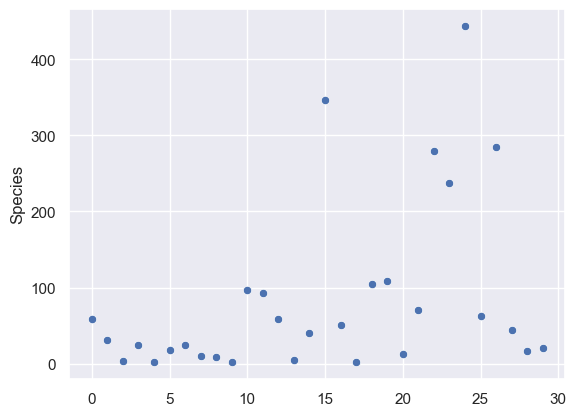

In [24]:
df = pd.read_csv("galapagos.csv")
sns.scatterplot(df.Species);

* Es gibt also 5 Inseln, die eine sehr viel reichhaltigere Fauna als die anderen haben
* Sind das die großen Inseln?

* Alternativhypothese:  Inseln mit reichhaltiger Fauna sind größer als die anderen
* Prüfen wir mit Mann-Whitney-U-Test

In [26]:
reich = df[df.Species>=150]
arm = df[df.Species<150]

In [27]:
reich.describe()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,318.60000,1373.602000,966.600000,9.860000,32.740000,128.114000
std,80.32621,1860.550153,427.743849,19.777462,25.876205,283.079535
min,237.00000,170.920000,640.000000,0.200000,0.000000,0.100000
25%,280.00000,551.620000,716.000000,0.600000,19.800000,0.520000
50%,285.00000,572.330000,864.000000,0.700000,28.100000,0.570000
75%,347.00000,903.820000,906.000000,2.600000,49.200000,4.890000
max,444.00000,4669.320000,1707.000000,45.200000,66.600000,634.490000


In [28]:
arm.describe()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,38.560000,39.330000,248.320000,10.100000,61.824000,287.695200
std,34.467473,127.392845,307.762046,13.454182,73.035592,940.916069
min,2.000000,0.010000,25.000000,0.400000,0.400000,0.030000
25%,10.000000,0.210000,93.000000,1.100000,10.700000,0.520000
50%,25.000000,1.240000,147.000000,4.300000,47.400000,2.850000
75%,58.000000,17.950000,259.000000,10.700000,88.300000,59.560000
max,108.000000,634.490000,1494.000000,47.400000,290.200000,4669.320000


In [29]:
res = stats.mannwhitneyu(reich.Area, arm.Area, alternative='greater')
res

MannwhitneyuResult(statistic=122.0, pvalue=0.0005123847398218562)

# Effektstärke beim Mann-Whitney-U-Test

* die Teststatistik des Mann-Whitney-U-Tests wird mit U bezeichnet
* die beiden Stichprobenumfänge sind $n_1$ und $n_2$

Die Formel für die Effektstärke nach Cohen's&nbsp;r ist entweder
$$  r = 1 - \frac{2U}{n_1 \cdot n_2}
$$
wenn diese Zahl positiv ist, sonst
$$  r = \frac{2U}{n_1 \cdot n_2} - 1
$$

In [30]:
U = res.statistic
n1 = 5
n2 = 25
r = 1 - 2*U/(n1*n2)
r

-0.952

also

In [31]:
r = 2*U/(n1*n2) - 1
r

0.952

Sehr großer Effekt

Dieselbe Frage, aber als unterer Test:

In [32]:
stats.mannwhitneyu(arm.Area, reich.Area, alternative='less')

MannwhitneyuResult(statistic=3.0, pvalue=0.0005123847398218562)

In [33]:
1 - 2*3/(n1*n2)

0.952

# Rangtests

* Wilcoxon und Mann-Whitney sind Rangtests:

* die Daten werden geordnet
* die Ränge der Elemente der beiden Gruppen werden jeweils addiert

* aus diesen Rangsummen werden die Teststatistiken berechnet

* kleiner Unterschied der Rangsummen bedeuten kleine Unterschiede der Daten und daher Beibehaltung der Nullhypothese

In [39]:
df['Rang'] = df.Area.rank()
df.head()

,Unnamed: 0,Species,Area,Elevation,Nearest,Scruz,Adjacent,Rang
0,Baltra,58,25.09,346,0.6,0.6,1.84,21.0
1,Bartolome,31,1.24,109,0.6,26.3,572.33,12.5
2,Caldwell,3,0.21,114,2.8,58.7,0.78,7.0
3,Champion,25,0.10,46,1.9,47.4,0.18,5.0
4,Coamano,2,0.05,77,1.9,1.9,903.82,3.0


In [40]:
arm = df[df.Species<150]
reich = df[df.Species>=150]
reich

,Unnamed: 0,Species,Area,Elevation,Nearest,Scruz,Adjacent,Rang
15,Isabela,347,4669.32,1707,0.7,28.1,634.49,30.0
22,SanCristobal,280,551.62,716,45.2,66.6,0.57,26.0
23,SanSalvador,237,572.33,906,0.2,19.8,4.89,27.0
24,SantaCruz,444,903.82,864,0.6,0.0,0.52,29.0
26,SantaMaria,285,170.92,640,2.6,49.2,0.10,25.0


In [36]:
T1 = reich.Rang.sum()
T1

137.0

In [37]:
T2 = arm.Rang.sum()
T2

328.0

In [41]:
U1 = n1*n2 + n1*(n1+1)/2 - T1
U1

3.0

In [42]:
U2 = n1*n2 + n2*(n2+1)/2 - T2
U2

122.0

* Wie man daraus den p-Wert bestimmt, ist nicht unser Thema

* Wichtig:  Die tatsächlichen Werte für die Flächen der Inseln sind in die Berechnung der Teststatistik nicht eingegangen
* eingegangen ist nur die Reihenfolge

## konservative Tests

* Der $t$-Test verwendet eine Verteilungsannahme:  Daten müssen normalverteilt sein
* Tests, die auch bei Verletzung der Verteilungsannahmen noch gute Ergebnisse liefern, heißen *konservativ*
* Der $t$-Test ist konservativ

# Probeklausur

* am Wochende Veröffentlichung von Beispielaufgaben auf http://www.math.uni-duesseldorf.de/~internet/bio2425
* am nächsten Mittwoch werden die Lösungen vorgerechnet